In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.describe()
df['Type'].value_counts()
df['Method'].value_counts()
df['Regionname'].value_counts()
df['Date'].value_counts()

28/10/2017    1119
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
              ... 
4/02/2016       44
30/09/2017      22
20/01/2018      19
27/01/2018      12
28/01/2016       3
Name: Date, Length: 78, dtype: int64

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'DayDelta'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

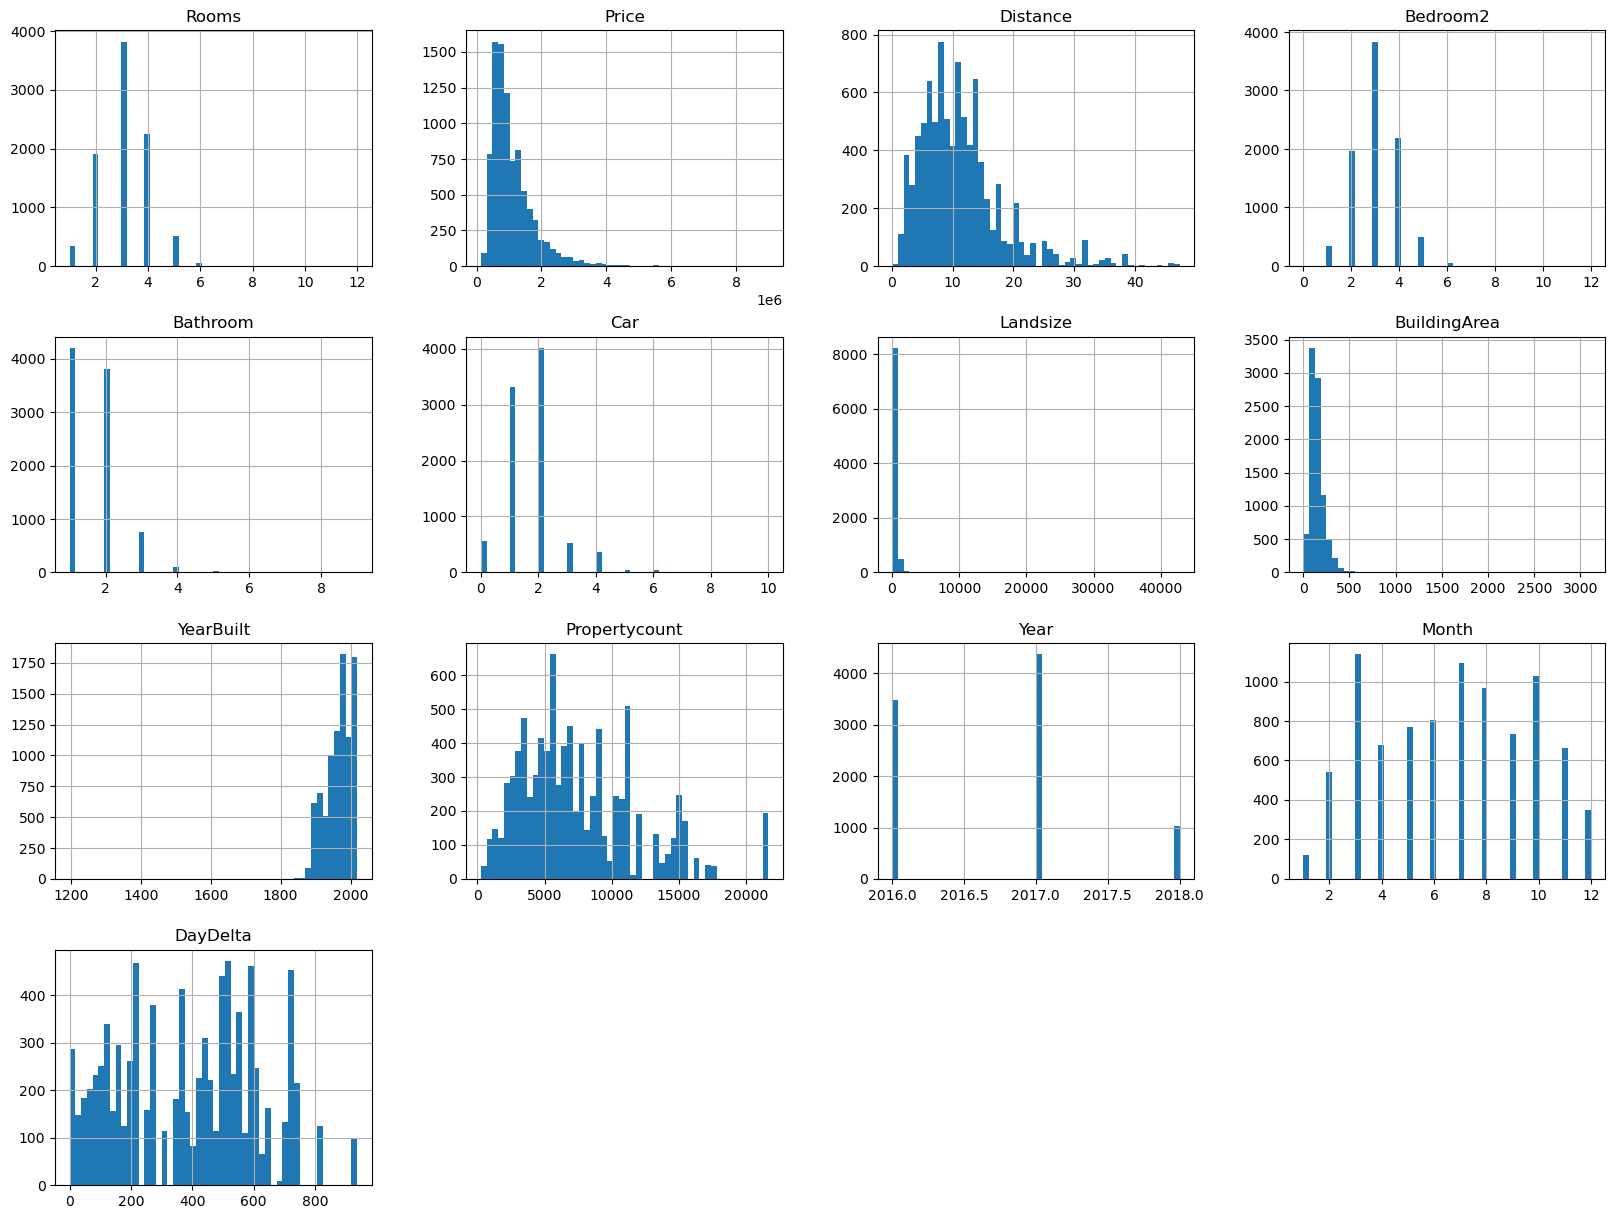

In [17]:
df.hist(bins=50, figsize=(20,15))

In [4]:
df = df.dropna()

In [5]:
df.count()
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Postcode'] = df['Postcode'].astype('category')

C:\Users\ardaz\AppData\Local\Temp\ipykernel_5740\158053784.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['YearMonth'] = df['Date'].apply(lambda x: str(x.strftime('%Y-%m')))

In [8]:
mindate = df['Date'].min()
df['DayDelta'] = df['Date'].apply(lambda x: (x - mindate) / np.timedelta64(1, 'D'))

In [9]:
df = df.drop(['Address', 'SellerG', 'Date'], axis=1)
df = df.drop(['Lattitude','Longtitude'], axis=1)

In [10]:
df_X = pd.get_dummies(df.drop(['Price'], axis=1))
df_Y = df['Price']

In [11]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(df_X, df_Y, test_size=0.30, random_state=2019)

In [12]:
SCORE_TABLE = pd.DataFrame(columns=['Model Name', 'Train Score', 'Validation Score'])
def ROW_COUNTER():    
    def add():        
        counter[0] = counter[0] + 1        
        return counter    
    counter = [0]    
    return add
ROW_COUNT = ROW_COUNTER()

In [13]:
from sklearn import linear_model

M1 = linear_model.LinearRegression().fit(X_TRAIN, Y_TRAIN)
M1_TRAIN_SCORE = M1.score(X_TRAIN, Y_TRAIN) #R^2 = 0.289 on training data
M1_VALID_SCORE = M1.score(X_TEST, Y_TEST) #R^2 = 0.295 on validation data
SCORE_TABLE.loc[0] = ['Multiple linear regression', M1_TRAIN_SCORE, M1_VALID_SCORE]

In [14]:
from sklearn import ensemble

In [15]:
M6 = ensemble.GradientBoostingRegressor(n_estimators=100, min_samples_leaf=20, random_state=1992).fit(X_TRAIN, Y_TRAIN)
M6_TRAIN_SCORE = M6.score(X_TRAIN, Y_TRAIN)
M6_VALID_SCORE = M6.score(X_TEST, Y_TEST)
SCORE_TABLE.loc[ROW_COUNT()[0]] = [f'Gradient Boosting', M6_TRAIN_SCORE,M6_VALID_SCORE]

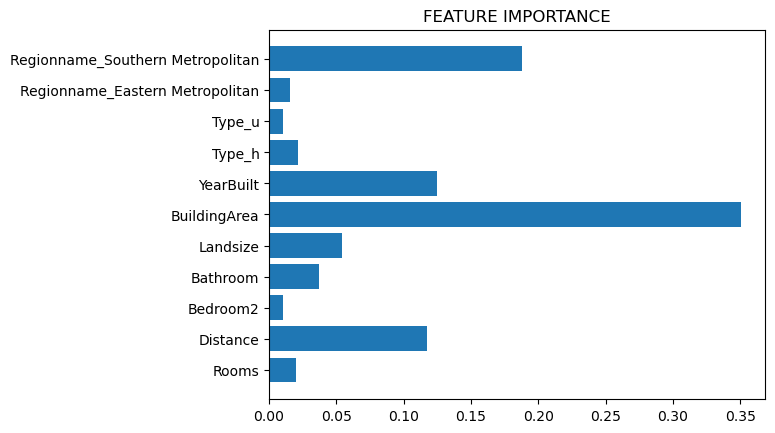

In [16]:
FEATURE_IMPORTANCE = list(zip(X_TRAIN.columns, M6.feature_importances_))
FEATURE_IMPORTANCE = [i for i in FEATURE_IMPORTANCE if i[1]>0.01]
FEATURE = [i[0] for i in FEATURE_IMPORTANCE]
IMPORTANCE = [i[1] for i in FEATURE_IMPORTANCE]
plt.barh(FEATURE, IMPORTANCE)
plt.title("FEATURE IMPORTANCE")
plt.show()